Intro to simple linear regression

In [11]:
import numpy as np
import matplotlib.pyplot as mpt
import pandas as pd
import seaborn as sns

In [12]:
dta=pd.read_csv("/Users/andymiaogu/Desktop/preply_umair/DATA/Advertising.csv")

In [4]:
dta.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [5]:
# combine the price of TV radio and newspaper to total_spend
dta['total_spend'] = dta['TV']+dta['radio']+dta['newspaper']
dta.head(5)

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

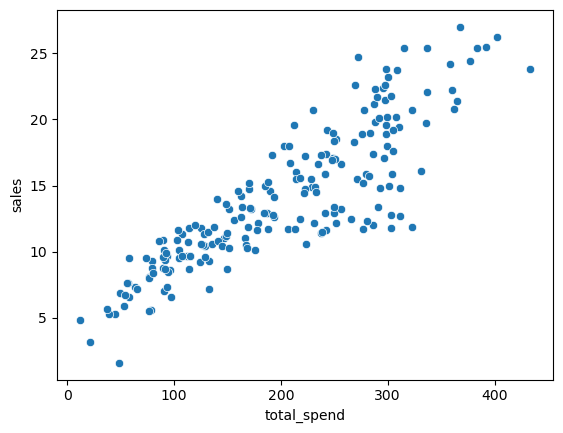

In [6]:
sns.scatterplot(data=dta, x="total_spend", y="sales",markers="x")

<Axes: xlabel='total_spend', ylabel='sales'>

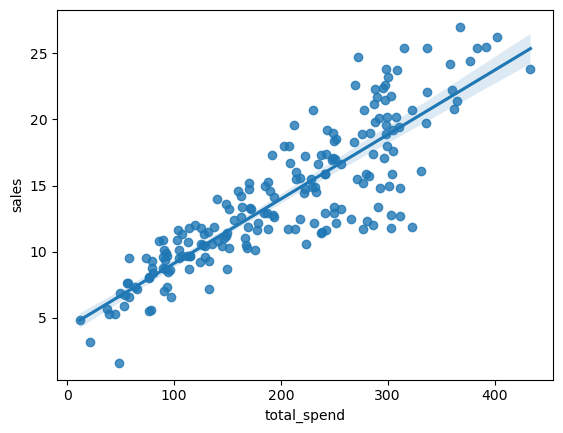

In [7]:
### least square line is best fit line for this kind of  data
sns.regplot(data=dta, x="total_spend", y="sales")

In [8]:
### how to get the line so i can control it
# y = m*x +c
## using polyfit i can get the value of slop m and intercept c

m,c = np.polyfit(dta['total_spend'] , dta['sales'],1 )
print(m,c)



0.04868787931904817 4.243028216036327


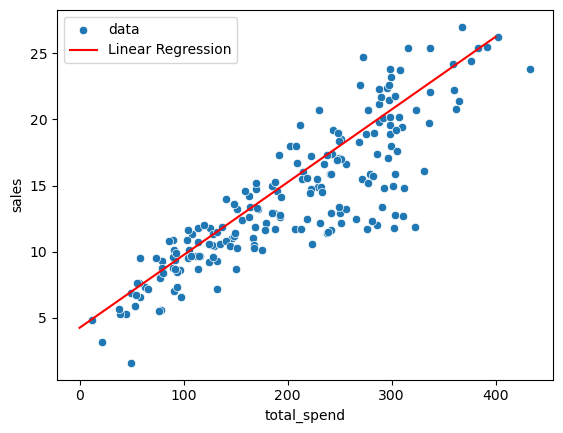

In [9]:
### so make value of x which are from 0 to 500 and total nmebrs should be 1000
x =np.linspace( 0,400 ,1000 )
  
m = 0.055#0.03868787931904818
c = 4.243028216036325
line =  (m)*x + (c)
sns.scatterplot(data=dta, x="total_spend", y="sales",markers="x")
mpt.plot(x,line,color="red")
mpt.legend(['data','Linear Regression'])

In [10]:
np.polyfit(dta['total_spend'] , dta['sales'],3 )      

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

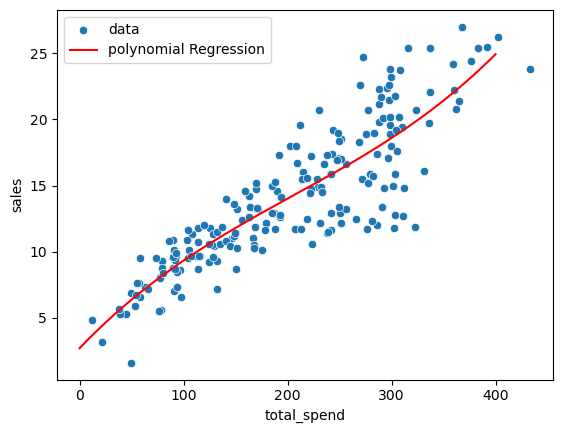

In [11]:
m1 = 3.07615033e-07
m2 = -1.89392449e-04
m3 =  8.20886302e-02
c=  2.70495053


p =  m1*x**3 + m2*x**2 + m3*x + c
sns.scatterplot(data=dta, x="total_spend", y="sales",markers="x")
mpt.plot(x,p,color="red")
mpt.legend(['data','polynomial Regression'])

In [12]:
def polyreg (dta,size,xl):
    x = np.polyfit(dta['total_spend'],dta['sales'],size)
    f = 0
    for i in range(0,len(x)-1):
        f = f+ x[i]* (xl**(len(x)-i-1) )
    f = f + x[-1]
    return f


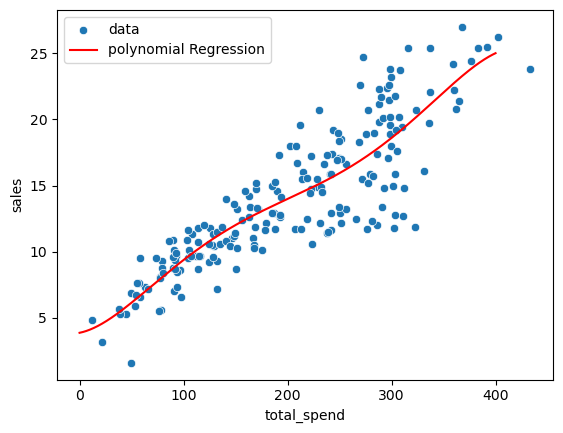

In [14]:
out = polyreg(dta,5,x)
sns.scatterplot(data=dta, x="total_spend", y="sales",markers="x")
mpt.plot(x,out,color="red")
mpt.legend(['data','polynomial Regression'])

Re
gression with Scikit-Learn module

In [15]:
#### Record your voice, from ggogle change it to wav file ...,. open it in python and using chatgpt find the code that will predicti if this is a male or female voice



2937856
48000


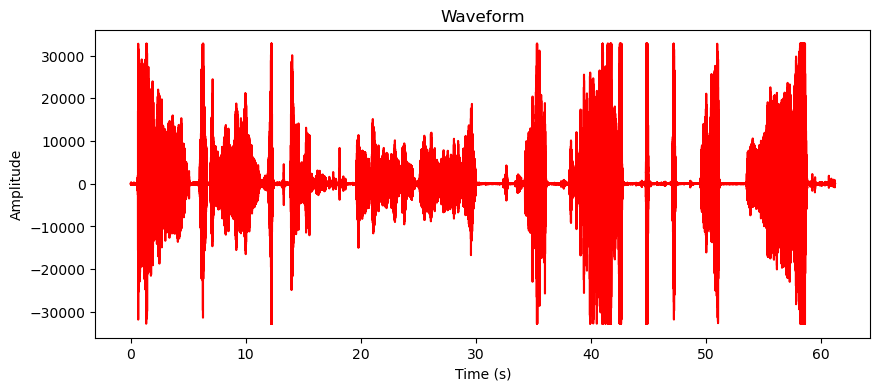

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

# Read the WAV file
sampling_rate, audio_data = wavfile.read('/Users/andymiaogu/Desktop/preply_umair/data analysis/Machine Leaning/dangerous voice.wav')
print(len(audio_data))
print(sampling_rate)
# Convert audio data to mono if it's in stereo
if audio_data.ndim > 1:
    audio_data = audio_data[:, 0]

# Calculate the time axis
duration = len(audio_data) / sampling_rate
time = np.linspace(0., duration, len(audio_data))

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(time, audio_data, color='red')
import scipy
scipy.signal.find_peaks(audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


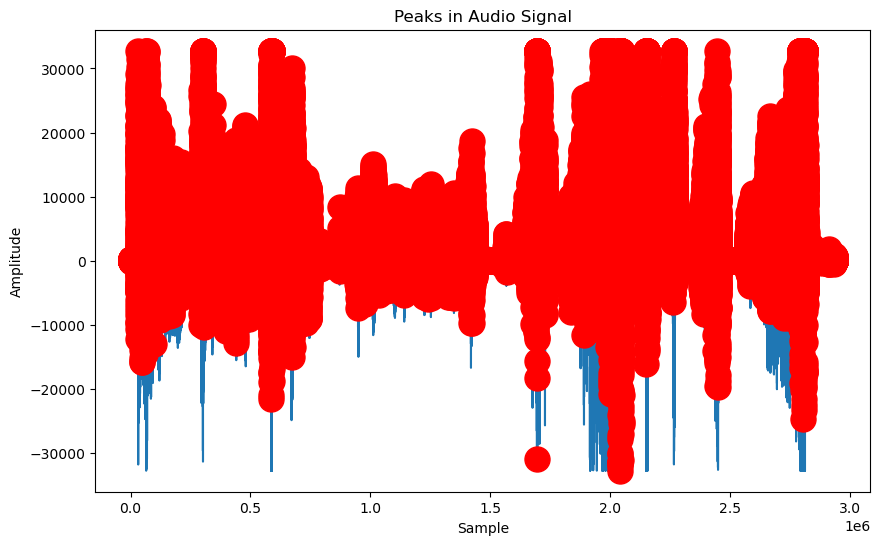

In [6]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Generate or load your audio signal
# audio_signal = ...

# Assuming you have a one-dimensional audio signal

# Find the peaks
peaks, _ = find_peaks(audio_data)

# Plot the audio signal
plt.figure(figsize=(10, 6))
plt.plot(audio_data)
plt.title('Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude') 

# Plot the peaks
plt.plot(peaks, audio_data[peaks], 'ro', markersize=18)
plt.title('Peaks in Audio Signal')
plt.show()


In [15]:
import matplotlib as mpt
import matplotlib.pyplot as mptp
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
dta=pd.read_csv("/Users/andymiaogu/Desktop/preply_umair/DATA/hearing_test.csv")

In [18]:
dta.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

<Axes: xlabel='test_result', ylabel='count'>

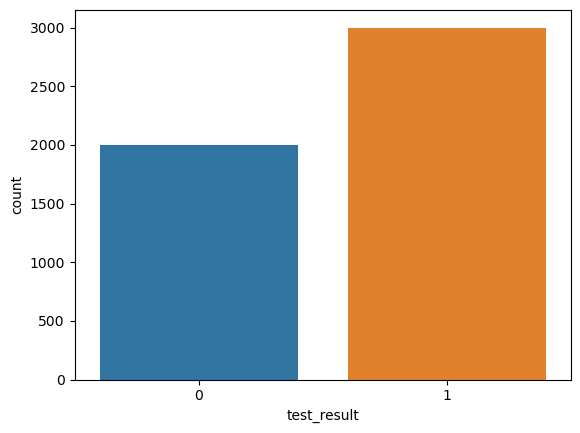

In [19]:
sns.countplot(data=dta, x="test_result") 

<Axes: xlabel='test_result', ylabel='age'>

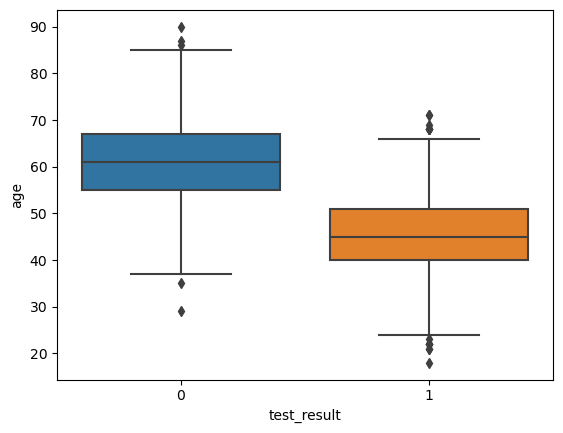

In [20]:
sns.boxplot(data=dta, x="test_result", y = "age")

<Axes: xlabel='physical_score', ylabel='age'>

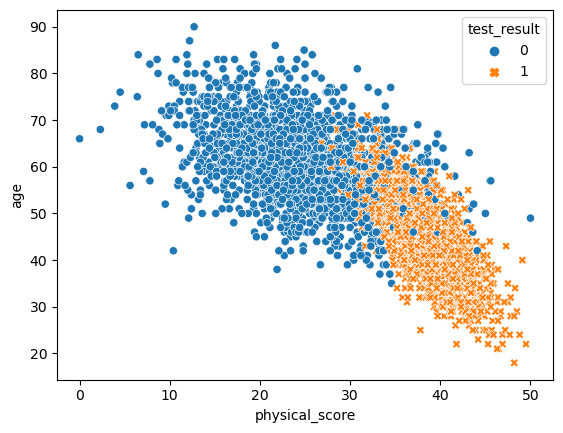

In [21]:
sns.scatterplot(data=dta, x="physical_score", y = "age",hue = "test_result", style="test_result")

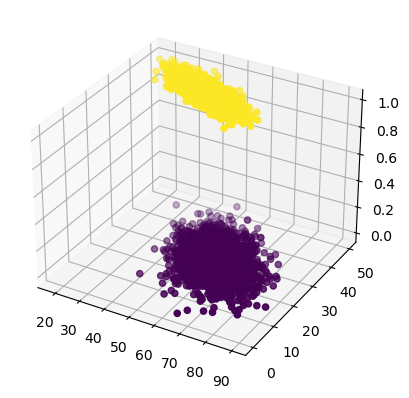

In [22]:
from mpl_toolkits.mplot3d import Axes3D as ad
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter (dta['age'],dta['physical_score'],dta['test_result']  ,c = dta['test_result']   )

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data frame
data = dta#pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with the actual file name or path

# Split the data into input features (X) and target variable (y)
X = data[['age', 'physical_score']]
y = data['test_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.897


In [35]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# Your code here
ages =[5,10,15,20,30,45,88]
scores = [5,10,20,40,50,20]

for each in ages:
    for i in scores:
                
        x = model.predict([[each,i]])
        print(f"for {each} and {i}")
        if x == 1:
            print(print("diaeses is found"))
        else:
            print("no diaeses")

# Re-enable warnings (optional)
warnings.filterwarnings("default")


for 5 and 5
no diaeses
for 5 and 10
no diaeses
for 5 and 20
no diaeses
for 5 and 40
diaeses is found
None
for 5 and 50
diaeses is found
None
for 5 and 20
no diaeses
for 10 and 5
no diaeses
for 10 and 10
no diaeses
for 10 and 20
no diaeses
for 10 and 40
diaeses is found
None
for 10 and 50
diaeses is found
None
for 10 and 20
no diaeses
for 15 and 5
no diaeses
for 15 and 10
no diaeses
for 15 and 20
no diaeses
for 15 and 40
diaeses is found
None
for 15 and 50
diaeses is found
None
for 15 and 20
no diaeses
for 20 and 5
no diaeses
for 20 and 10
no diaeses
for 20 and 20
no diaeses
for 20 and 40
diaeses is found
None
for 20 and 50
diaeses is found
None
for 20 and 20
no diaeses
for 30 and 5
no diaeses
for 30 and 10
no diaeses
for 30 and 20
no diaeses
for 30 and 40
diaeses is found
None
for 30 and 50
diaeses is found
None
for 30 and 20
no diaeses
for 45 and 5
no diaeses
for 45 and 10
no diaeses
for 45 and 20
no diaeses
for 45 and 40
diaeses is found
None
for 45 and 50
diaeses is found
None
for 4

In [41]:
import numpy
import matplotlib.pyplot as plt
x = numpy.zeros([64])
x = x.reshape(8,8)
x[::2,::2]= 1
x[1::2,1::2] = 1
x

array([[1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.]])

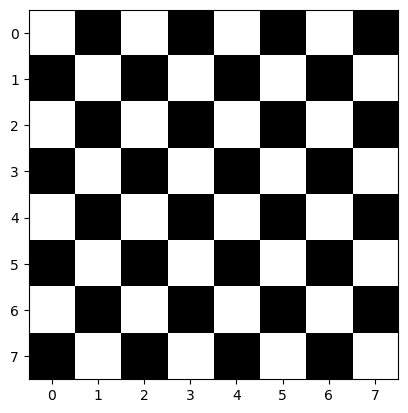

In [46]:
plt.imshow(x,cmap="gray")

In [48]:
import pygame as gm

gm.init()

board_width=400
board_height=400

logo_width = 50
logo_height = 50

step_size = 50

logo_x = board_width //2 - logo_width //2
logo_y = board_height //2 - logo_height //2

logo_direction = 'forward'

chessboard = gm.Surface(board_width, board_height)
chessboard.fill(255,255,255)

ValueError: size needs to be (number width, number height)

: 